## Preguntas de investigación
1. ¿Cómo varía la prevalencia de diabetes según las categorías de BMI?  
2. ¿Cuál es la relación entre la edad y la probabilidad de diabetes por sexo?  
3. ¿El nivel de actividad física se asocia con un menor riesgo de diabetes?

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv(r"diabetes_012_health_indicators_BRFSS2015.csv")
df['Diabetes_binary'] = df['Diabetes_012'].map({0:0, 1:1, 2:1})
df['BMI_cat'] = pd.cut(df['BMI'],
                       bins=[0, 18.5, 25, 30, 100],
                       labels=['Underweight','Normal','Overweight','Obese'])
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary,BMI_cat
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0,Obese
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0,Normal
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0,Overweight
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0,Overweight
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0,Normal


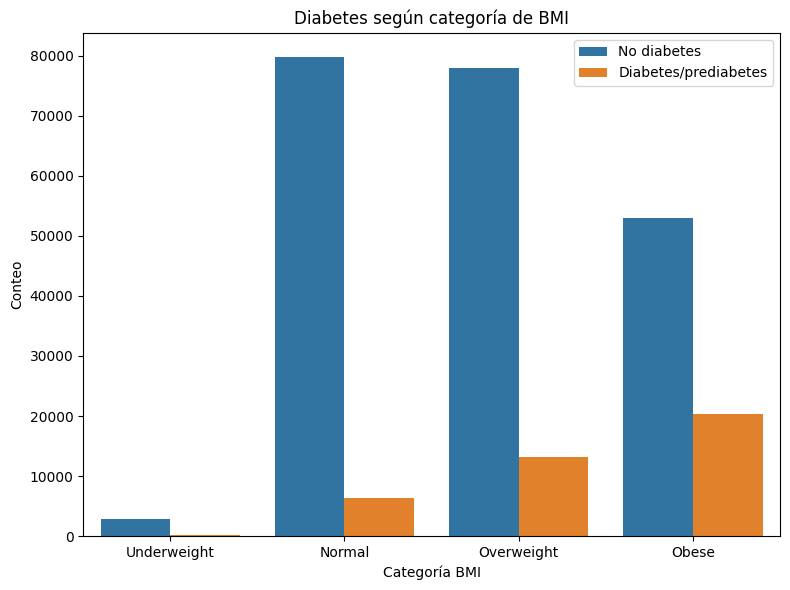

In [45]:
# 1. Prevalencia de diabetes por categoría de BMI

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='BMI_cat', hue='Diabetes_binary')
plt.title('Diabetes según categoría de BMI')
plt.xlabel('Categoría BMI')
plt.ylabel('Conteo')
plt.legend(['No diabetes','Diabetes/prediabetes'])
plt.tight_layout()
plt.show()

**Interpretación:** Se observa cómo la proporción de casos de diabetes/prediabetes crece progresivamente de "Underweight" a "Obese".

In [46]:
# 2. Relación entre edad y diabetes por sexo
age_sex = df.groupby(['Sex','Diabetes_binary'])['Age'].mean().unstack()
age_sex.rename(index={0:'Mujer',1:'Hombre'}, inplace=True)
age_sex

Diabetes_binary,0,1
Sex,,
Mujer,7.899338,9.296788
Hombre,7.639470,9.398007


**Interpretación:** Las personas con diabetes tienden a ser mayores; esta tendencia se mantiene tanto en mujeres como en hombres. Los hombres presentan mas casos.

In [47]:
# 3. Actividad física y riesgo de diabetes
phys_rate = df.groupby('PhysActivity')['Diabetes_binary'].mean()
phys_rate

PhysActivity
0.0    0.235557
1.0    0.132498
Name: Diabetes_binary, dtype: float64

**Interpretación:** La tasa de diabetes/prediabetes es menor entre quienes reportan actividad física en los últimos 30 días.

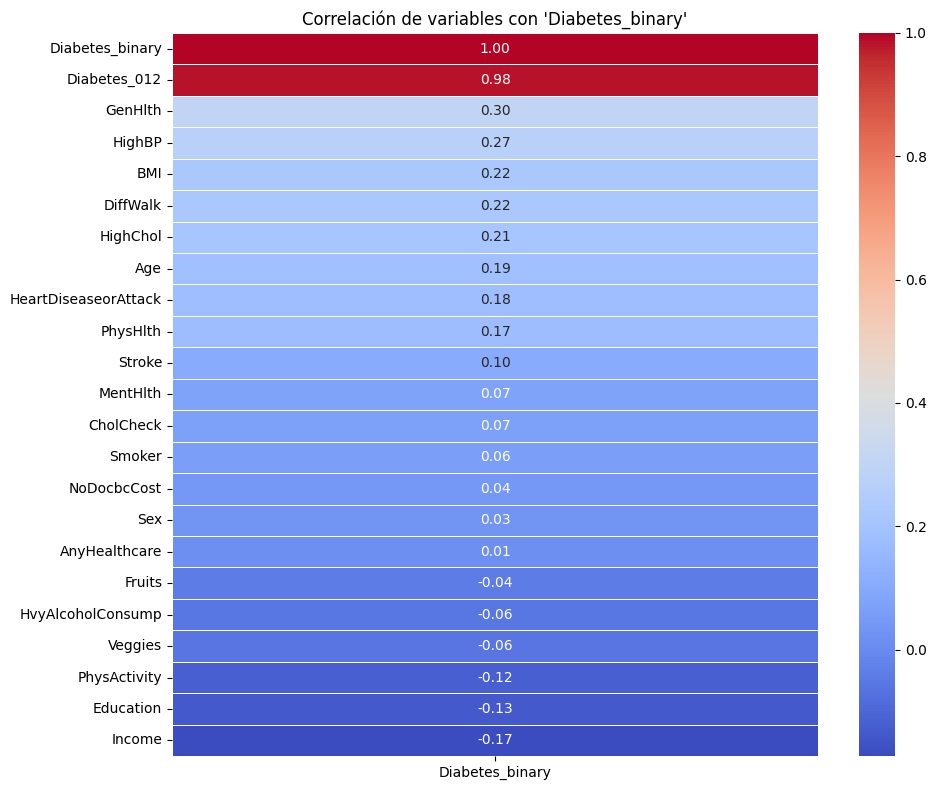

In [48]:
# Crear variable binaria de diabetes
df['Diabetes_binary'] = df['Diabetes_012'].map({0: 0, 1: 1, 2: 1})

# Calcular matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Visualizar correlación con 'Diabetes_binary'
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix[["Diabetes_binary"]].sort_values(by="Diabetes_binary", ascending=False),
    annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5
)
plt.title("Correlación de variables con 'Diabetes_binary'")
plt.tight_layout()
plt.show()

## Análisis de correlación

El mapa de calor revela que las variables más correlacionadas con la condición de diabetes son:
- `HighBP` y `HighChol`: correlación positiva moderada (~0.27 y ~0.21)
- `Age`: correlación leve positiva (~0.19)
- `Smoker` y `MentHelth`: correlaciones más bajas pero positivas

Estas relaciones sugieren que la preción alta es un factor importante en la prevalencia de diabetes, seguido del Colesterol alto.


In [49]:
# Selección de variables predictoras
X = df[["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
          "Fruits", "Veggies", "HvyAlcoholConsump", "GenHlth", "MentHlth", "PhysHlth",]]
y = df["Diabetes_binary"]

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X, y)

# Calcular predicciones y R^2
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R² del modelo con Age y BMI como predictores: {r2:.4f}")

R² del modelo con Age y BMI como predictores: 0.1458


## Modelo predictivo lineal (R²)

Se entrenó un modelo de regresión lineal utilizando `HighBP` y `HighChol` como predictores. El valor de R² obtenido indica qué proporción de la varianza en la variable objetivo (`Diabetes_binary`) es explicada por estos dos predictores.

Un R² bajo sugeriría que aunque `HighBP` y `HighChol` influyen en la diabetes, hay muchos otros factores importantes no modelados.
